In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

## Import Data

In [63]:
data = pd.read_excel('E:/Data Mining/EAS/heart.xlsx')

In [64]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explore

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [66]:
X_cat = data[['sex','cp','fbs','restecg','exang','slope','thal']]
X_num = data[['age','trestbps','chol','thalach','oldpeak','ca']]
Y = data['target']
X = data.drop(['target'],axis=1)
Y_num = pd.concat([X_num,Y],axis=1)
Y_cat = pd.concat([X_cat,Y],axis=1)

In [67]:
X_num.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [68]:
Y.value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show>

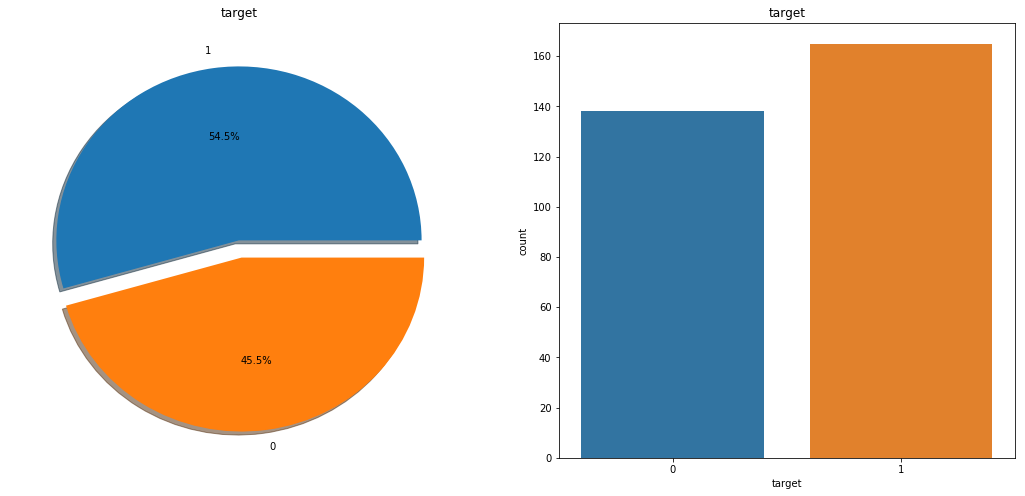

In [69]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['target'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=data,ax=ax[1])
ax[1].set_title('target')
plt.show

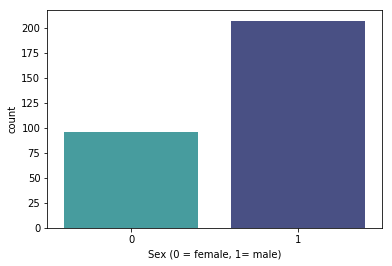

In [70]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [71]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


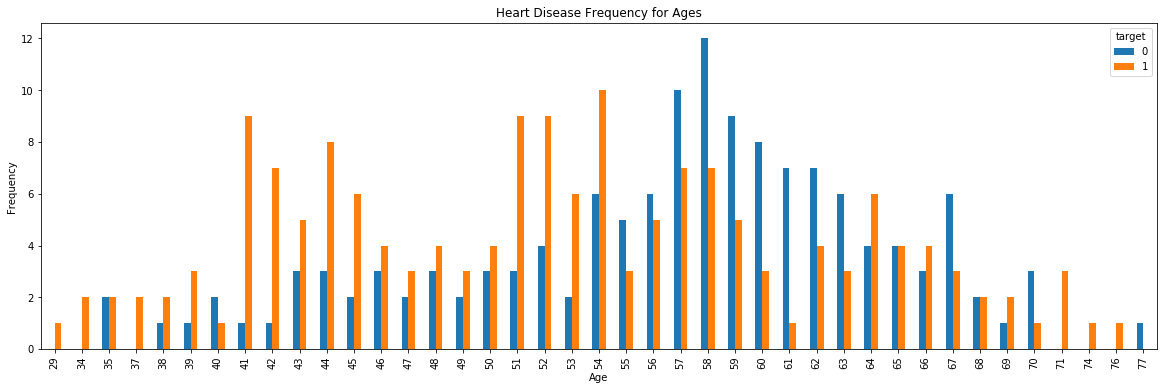

In [72]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

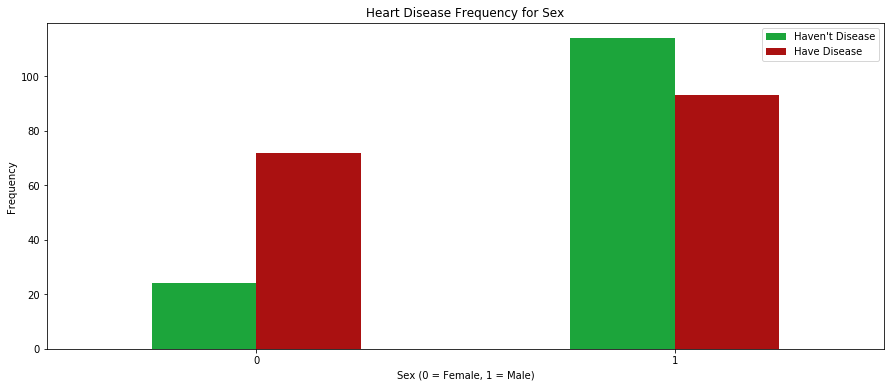

In [73]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

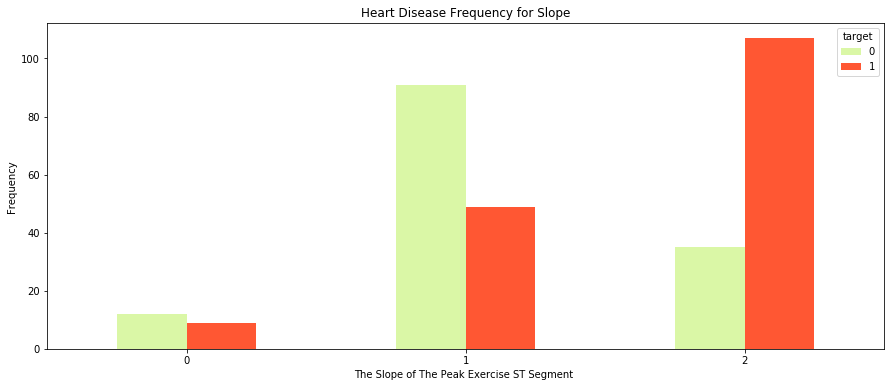

In [74]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

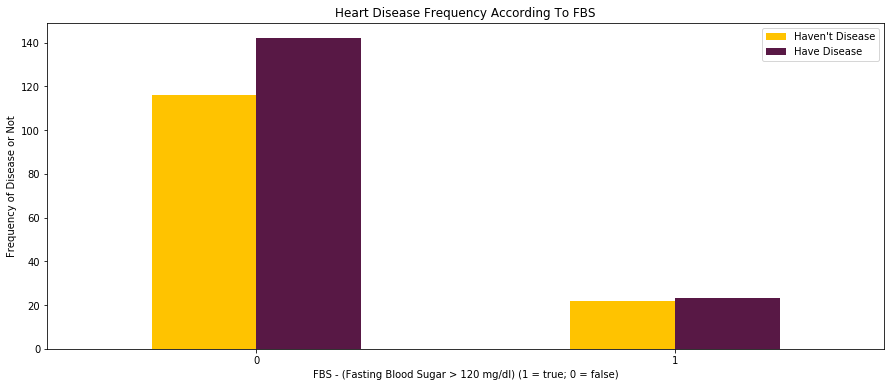

In [75]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

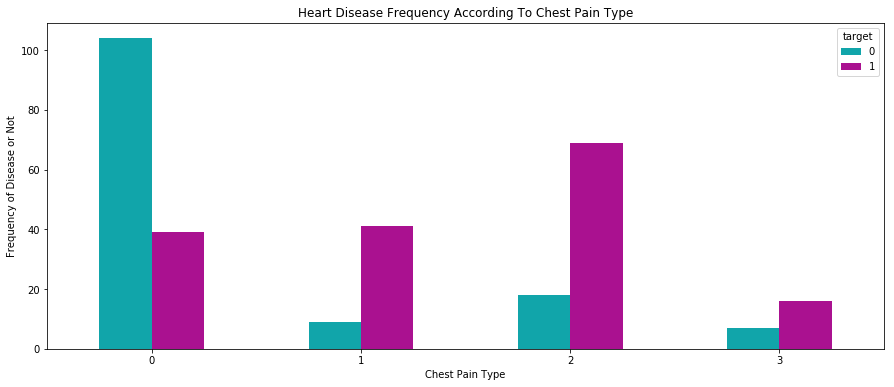

In [76]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [77]:
Y_num.groupby('target').mean()

,age,trestbps,chol,thalach,oldpeak,ca
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


In [78]:
def two_proprotions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [79]:
success_a = 165
size_a = 303
success_b = 138
size_b = 303

zscore, pvalue = two_proprotions_test(success_a, size_a, success_b, size_b)
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = 2.194, pvalue = 0.028


## Preprocess

In [80]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

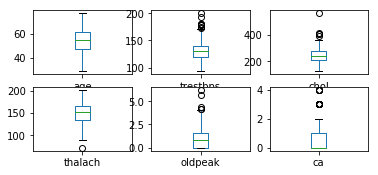

In [81]:
X_num.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

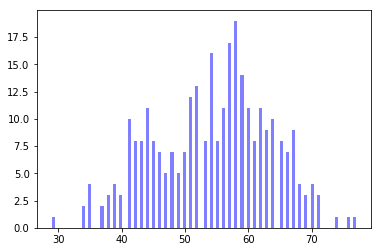

In [82]:
n, bins, patches = plt.hist(X_num['age'], 100, facecolor='blue', alpha=0.5)
plt.show()

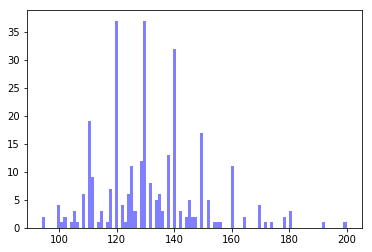

In [83]:
n, bins, patches = plt.hist(X_num['trestbps'], 100, facecolor='blue', alpha=0.5)
plt.show()

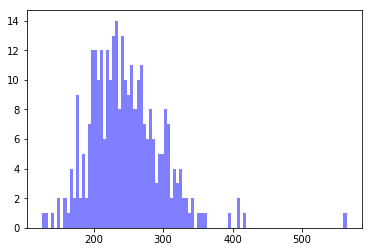

In [84]:
n, bins, patches = plt.hist(X_num['chol'], 100, facecolor='blue', alpha=0.5)
plt.show()

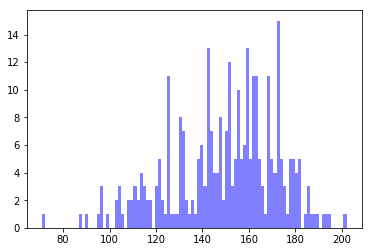

In [85]:
n, bins, patches = plt.hist(X_num['thalach'], 100, facecolor='blue', alpha=0.5)
plt.show()

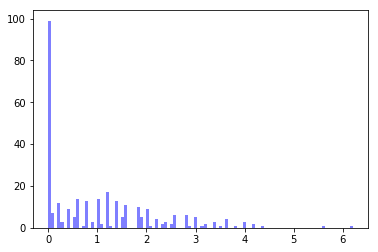

In [86]:
n, bins, patches = plt.hist(X_num['oldpeak'], 100, facecolor='blue', alpha=0.5)
plt.show()

## SMOTE

In [87]:
smt = SMOTE()
X1, Y1 = smt.fit_sample(X, Y)

In [88]:
np.bincount(Y1)

array([165, 165], dtype=int64)

In [89]:
Y_new = pd.DataFrame(Y1, columns = ['target1'])
X_new = pd.DataFrame(X1, columns= X.columns)

In [90]:
X_new['sex']=np.round(X_new['sex'])
X_new['cp']=np.round(X_new['cp'])
X_new['fbs']=np.round(X_new['fbs'])
X_new['restecg']=np.round(X_new['restecg'])
X_new['exang']=np.round(X_new['exang'])
X_new['slope']=np.round(X_new['slope'])
X_new['thal']=np.round(X_new['thal'])

In [91]:
data_new = pd.concat([X_new,Y_new],axis=1)
data_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target1
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


## Modification

In [92]:
a = pd.get_dummies(data_new['cp'], prefix = "cp")
b = pd.get_dummies(data_new['thal'], prefix = "thal")
c = pd.get_dummies(data_new['slope'], prefix = "slope")

In [93]:
data_new = pd.concat([data_new,a,b,c],axis=1)
data_new = data_new.drop(['cp','thal','slope'],axis=1)

In [94]:
X_new = data_new.drop(['target1'],axis=1)
Y_new = data_new['target1']

## Split Training Testing

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new,test_size=0.2,random_state=0)

In [96]:
train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)
train.to_excel("train_cat.xlsx")
test.to_excel("test_cat.xlsx")

## Logistic Regression

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
lg_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8825757575757576

In [98]:
matrix = confusion_matrix(Y_test, lg_pred)
print(matrix)

[[24  6]
 [ 3 33]]


In [99]:
akurasi = accuracy_score(Y_test, lg_pred)
presisi = precision_score(Y_test, lg_pred)
recall = recall_score(Y_test, lg_pred)
print(akurasi,presisi,recall)

0.8636363636363636 0.8461538461538461 0.9166666666666666


## Decision Tree

In [100]:
ds = DecisionTreeClassifier()
ds.fit(X_train, Y_train)
ds_pred = ds.predict(X_test)
ds.score(X_train, Y_train)

1.0

In [101]:
matrix = confusion_matrix(Y_test, ds_pred)
print(matrix)

[[23  7]
 [11 25]]


In [102]:
akurasi = accuracy_score(Y_test, ds_pred)
presisi = precision_score(Y_test, ds_pred)
recall = recall_score(Y_test, ds_pred)
print(akurasi,presisi,recall)

0.7272727272727273 0.78125 0.6944444444444444


## SVM

In [108]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

clf.score(X_train, Y_train)

0.8712121212121212

In [109]:
matrix = confusion_matrix(Y_test, svm_pred)
print(matrix)

[[24  6]
 [ 4 32]]


In [110]:
akurasi = accuracy_score(Y_test, svm_pred)
presisi = precision_score(Y_test, svm_pred)
recall = recall_score(Y_test, svm_pred)
print(akurasi,presisi,recall)

0.8484848484848485 0.8421052631578947 0.8888888888888888


## KNN

In [111]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

knn.score(X_train,Y_train)

0.8106060606060606

In [112]:
matrix = confusion_matrix(Y_test, knn_pred)
print(matrix)

[[26  4]
 [19 17]]


In [113]:
akurasi = accuracy_score(Y_test, knn_pred)
presisi = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
print(akurasi,presisi,recall)

0.6515151515151515 0.8095238095238095 0.4722222222222222


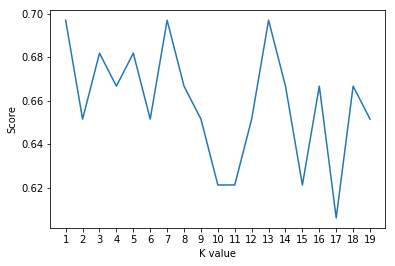

Maximum KNN Score is 69.70%


In [114]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

## Naive Bayes

In [115]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_pred = nb.predict(X_test)

nb.score(X_train,Y_train)

0.8371212121212122

In [116]:
matrix = confusion_matrix(Y_test, nb_pred)
print(matrix)

[[26  4]
 [ 4 32]]


In [117]:
akurasi = accuracy_score(Y_test, nb_pred)
presisi = precision_score(Y_test, nb_pred)
recall = recall_score(Y_test, nb_pred)
print(akurasi,presisi,recall)

0.8787878787878788 0.8888888888888888 0.8888888888888888
